<a href="https://colab.research.google.com/github/Stephyj2/Customer-Segmentation-Analysis/blob/main/Task1_Customer_Segmentation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Customer Segmentation Analysis:**

- **Description:** Use clustering algorithms to segment customers based on
their purchasing behaviour. This helps in understanding the different
types of customers and tailoring marketing strategies to meet their
needs.
- **Why:** Understanding customer segments allows businesses to target
specific groups with personalized marketing, leading to higher
satisfaction and retention.
- **Tasks:**
- Collect and preprocess customer data.
- Example datasets Click Here
- Apply clustering algorithms (e.g., K-means, hierarchical clustering).
- Analyse and interpret the clusters.
- Present findings with visualizations.
###**Task submission:**
1. Host the code on **GitHub Repository (public)**. Record the
code and output in a video. Post the video on YouTube.
2. Share links of code **(GitHub)** and video **(YouTube)** as a post
on YOUR LinkedIn profile.
3. Submit the LinkedIn link in Task Submission Form when
shared.


In [85]:
#Loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
# K-Means Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
#Load dataset
data_cluster = pd.read_csv("/content/drive/MyDrive/Code space_ Data Science Internship Tasks/customer_segmentation_data.csv")
#First few rows
data_cluster.head()

id  age  gender  income  spending_score  membership_years  \
0   1   38  Female   99342              90                 3   
1   2   21  Female   78852              60                 2   
2   3   60  Female  126573              30                 2   
3   4   40   Other   47099              74                 9   
4   5   65  Female  140621              21                 3   

   purchase_frequency preferred_category  last_purchase_amount  
0                  24          Groceries                113.53  
1                  42             Sports                 41.93  
2                  28           Clothing                424.36  
3                   5      Home & Garden                991.93  
4                  25        Electronics                347.08

In [45]:
#last few rows
data_cluster.tail()

id  age  gender  income  spending_score  membership_years  \
995   996   57    Male  112170              57                 6   
996   997   23   Other   65337              76                10   
997   998   23    Male  113097              40                 5   
998   999   22  Female  113695              63                 7   
999  1000   36  Female   90420               7                 2   

     purchase_frequency preferred_category  last_purchase_amount  
995                   1           Clothing                313.64  
996                  23          Groceries                632.83  
997                  42             Sports                 75.09  
998                  44        Electronics                505.16  
999                  31          Groceries                669.26

#**Step 1: Data Exploration**

####**1.1 Data Loading and Exploratory Data Analysis.**


In [46]:
#Shape of the dataset
data_cluster.shape

(1000, 9)

In [47]:
#Information of  dataset
data_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


In [48]:
#Creating copy of original dataframe
df = data_cluster.copy()

In [49]:
#To check datatypes
df.dtypes

id                        int64
age                       int64
gender                   object
income                    int64
spending_score            int64
membership_years          int64
purchase_frequency        int64
preferred_category       object
last_purchase_amount    float64
dtype: object

In [50]:
# Dataset summary statistics
df.describe()

id          age         income  spending_score  \
count  1000.000000  1000.000000    1000.000000     1000.000000   
mean    500.500000    43.783000   88500.800000       50.685000   
std     288.819436    15.042213   34230.771122       28.955175   
min       1.000000    18.000000   30004.000000        1.000000   
25%     250.750000    30.000000   57911.750000       26.000000   
50%     500.500000    45.000000   87845.500000       50.000000   
75%     750.250000    57.000000  116110.250000       76.000000   
max    1000.000000    69.000000  149973.000000      100.000000   

       membership_years  purchase_frequency  last_purchase_amount  
count        1000.00000         1000.000000           1000.000000  
mean            5.46900           26.596000            492.348670  
std             2.85573           14.243654            295.744253  
min             1.00000            1.000000             10.400000  
25%             3.00000           15.000000            218.762500  
50%             5.00000           27.000000            491.595000  
75%             8.00000           39.000000            747.170000  
max            10.00000           50.000000            999.740000

In [51]:
#To check for missing values
df.isnull().sum()

id                      0
age                     0
gender                  0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
preferred_category      0
last_purchase_amount    0
dtype: int64

**No missing values**

In [52]:
#Typcasting object to category
df['gender'] = df['gender'].astype('category')
df['preferred_category'] = df['preferred_category'].astype('category')

In [53]:
#DataTypes
df.dtypes

id                         int64
age                        int64
gender                  category
income                     int64
spending_score             int64
membership_years           int64
purchase_frequency         int64
preferred_category      category
last_purchase_amount     float64
dtype: object

  **Data Visualisation**

In [54]:
# Extracting Numerical Values
numerical_df = df.select_dtypes(include=['number'])

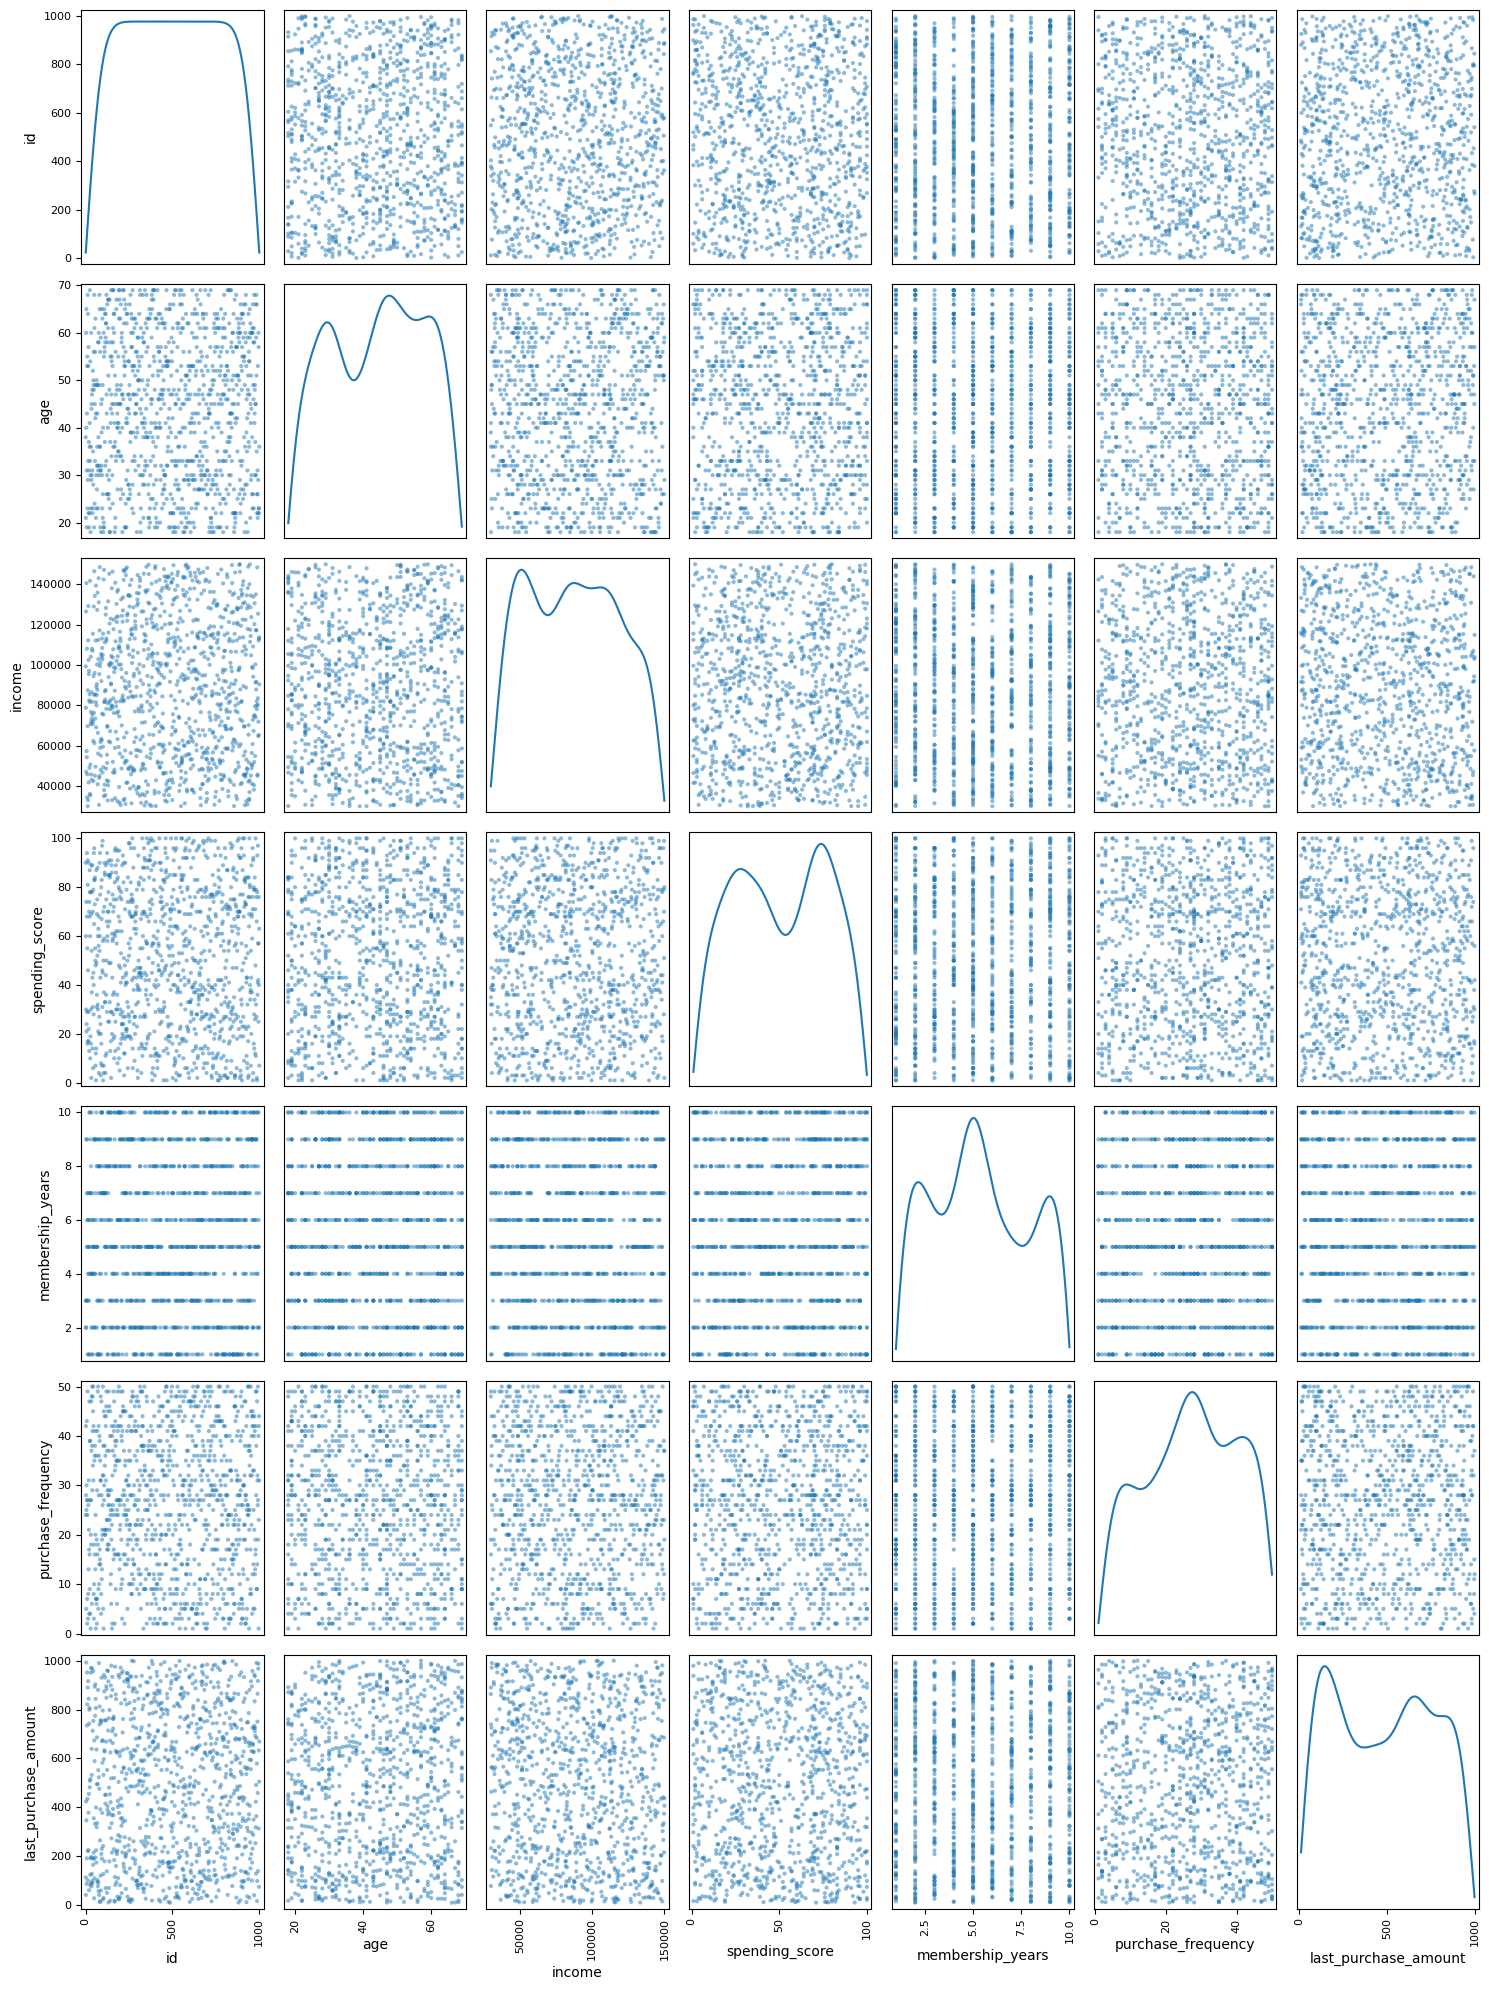

In [55]:
#Scatter plot
# numerical_df.scatter(figsize=(15, 20), bins=50, xlabelsize=8, ylabelsize=8)
#Create scatter matrix
pd.plotting.scatter_matrix(numerical_df, figsize=(15, 20), diagonal='kde') # Correct way to create scatter plot using pandas plotting
plt.tight_layout()
plt.show()

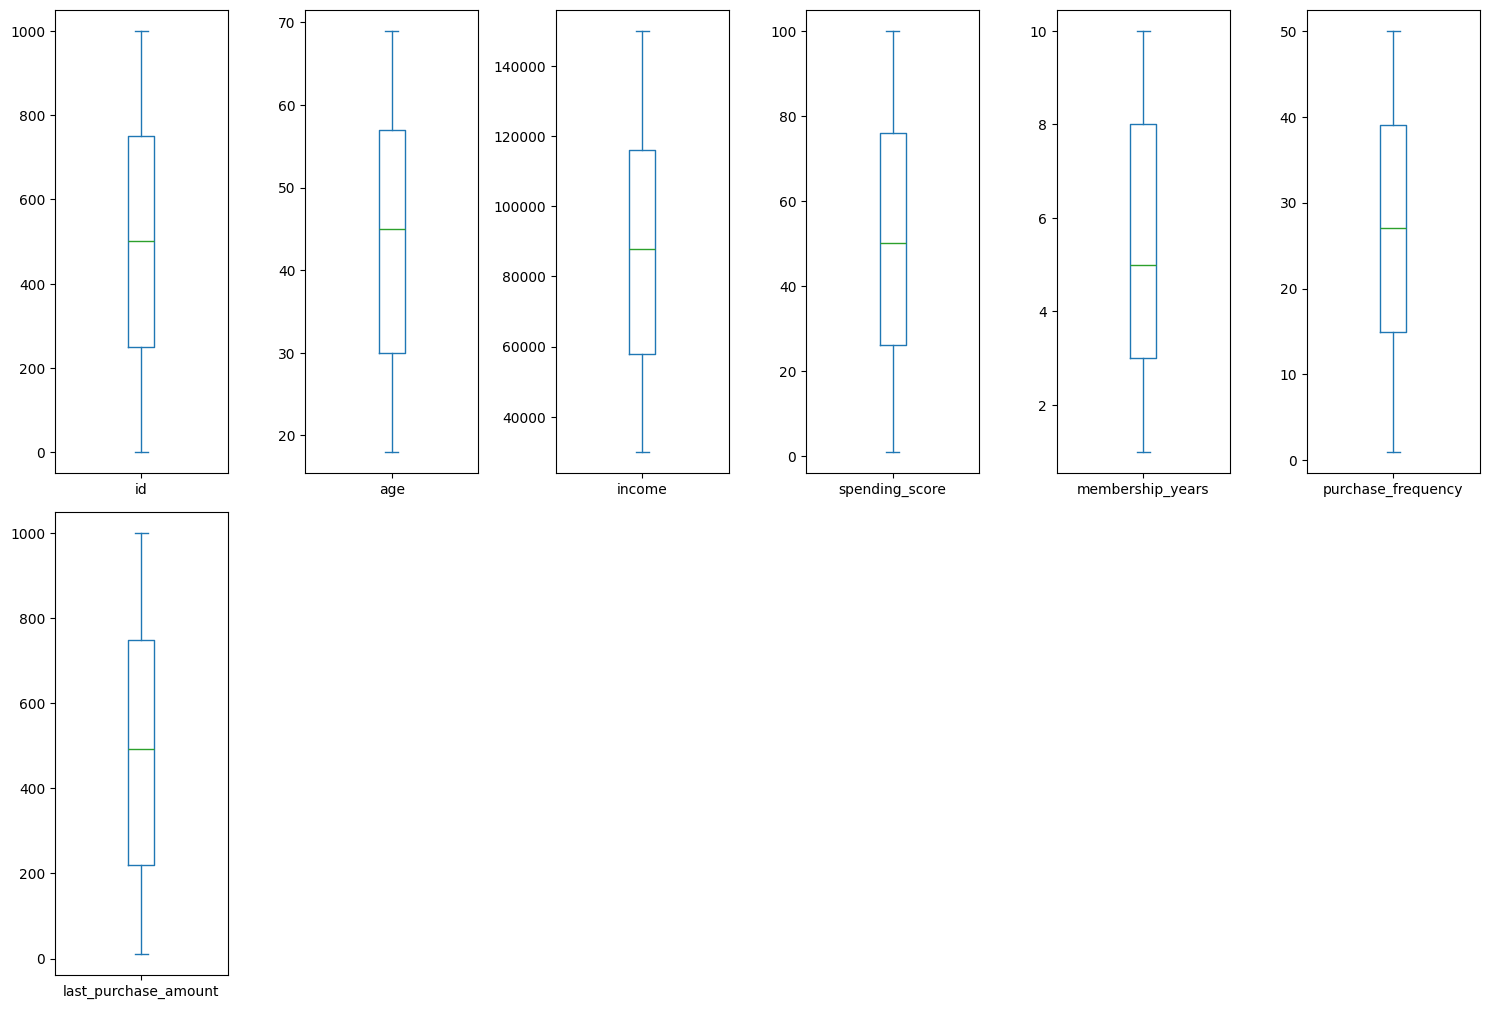

In [56]:
# Box plots
numerical_df.plot(kind='box', subplots=True, layout=(4, 6), figsize=(15, 20), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

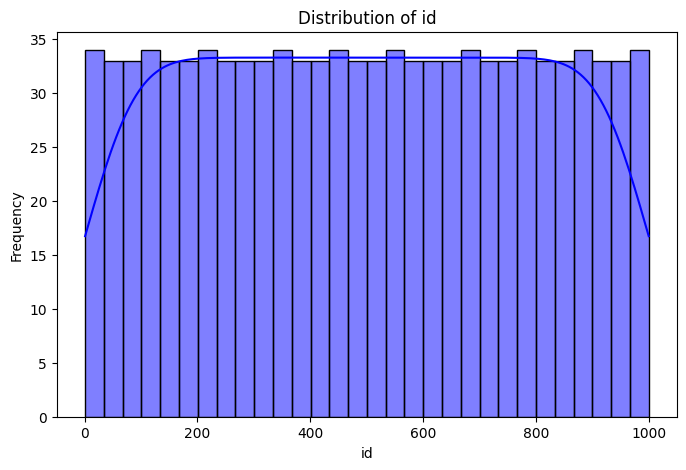

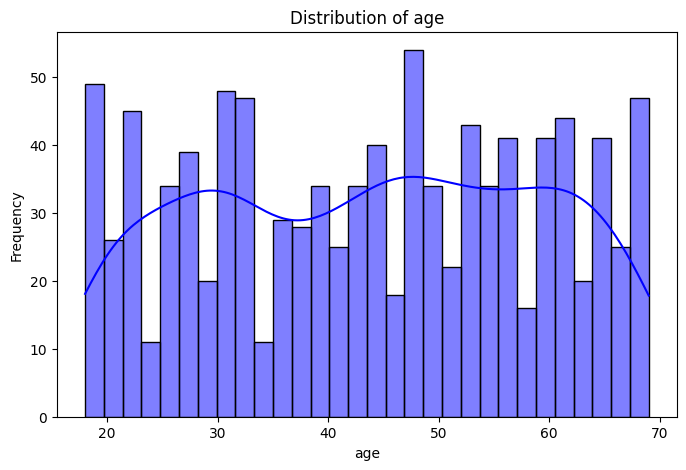

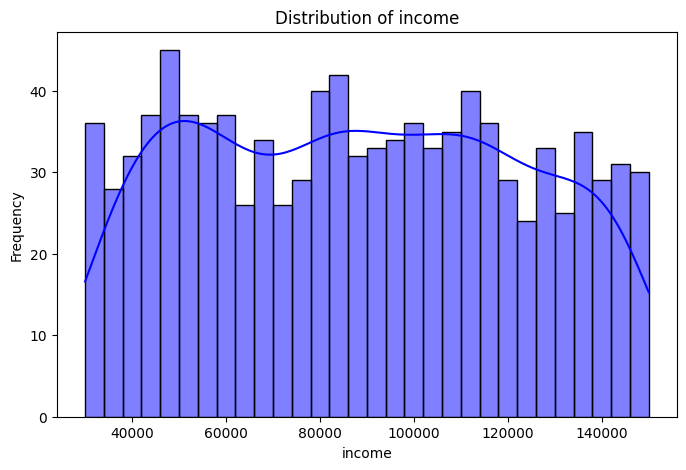

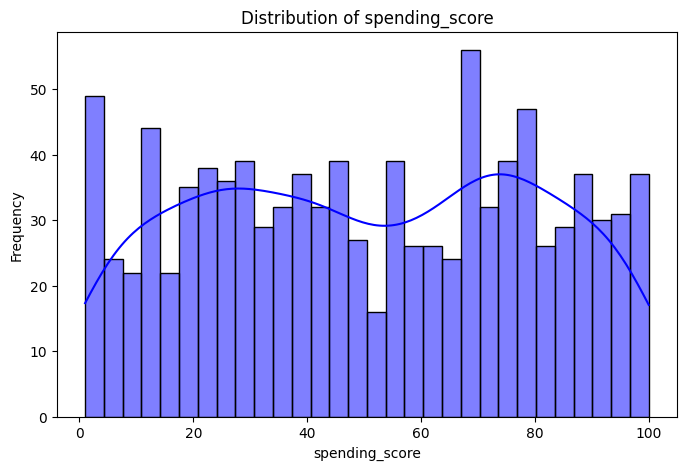

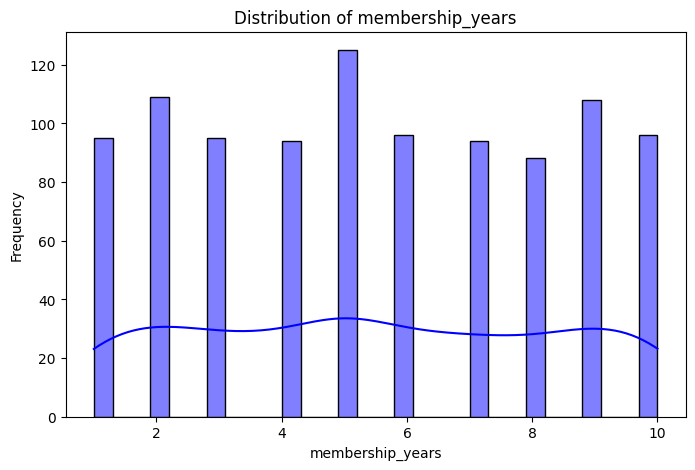

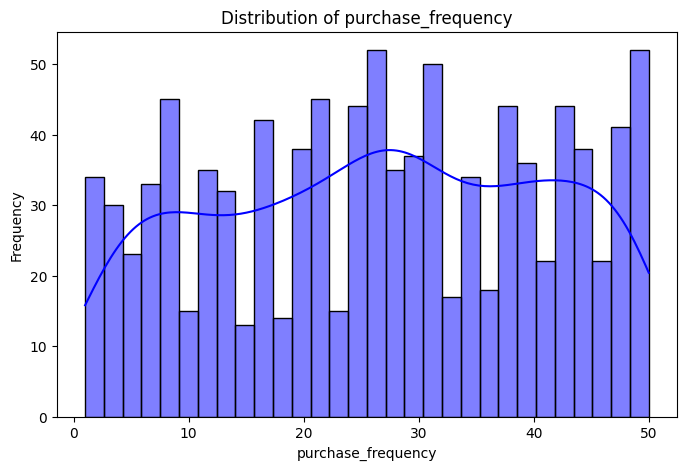

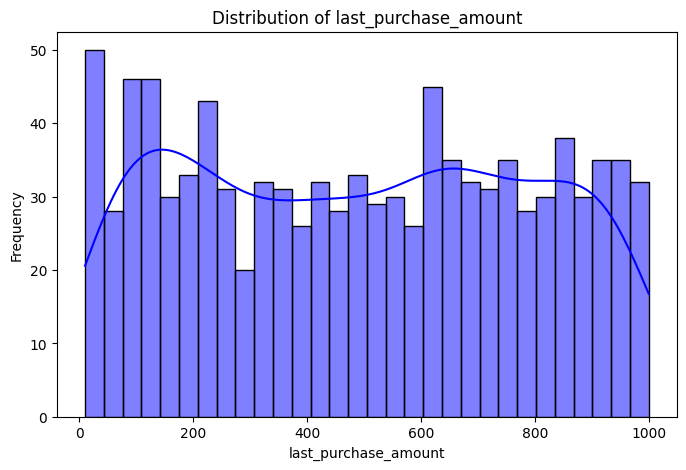

In [57]:
#Distribution Plots for Numerical Features
# Visualize distributions for numerical features
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    plt.figure(figsize=(8,5))
    sns.histplot(data_cluster[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

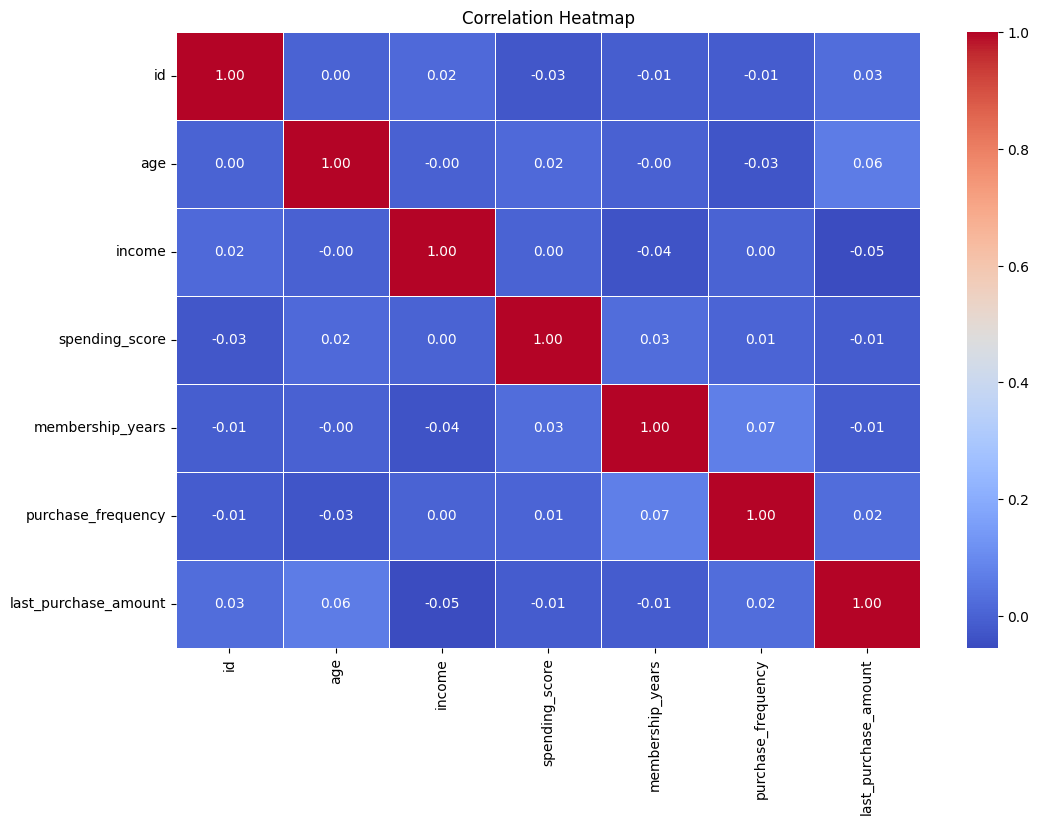

In [58]:
#Correlation Heatmap
# Compute the correlation matrix
# Include only numerical features for correlation calculation
correlation_matrix = df.select_dtypes(include=np.number).corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-59-3766f2ddf301>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[col], palette='viridis')


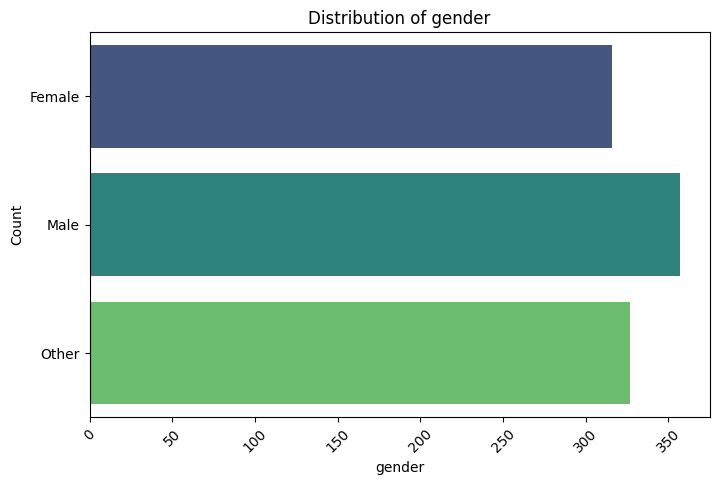

<ipython-input-59-3766f2ddf301>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[col], palette='viridis')


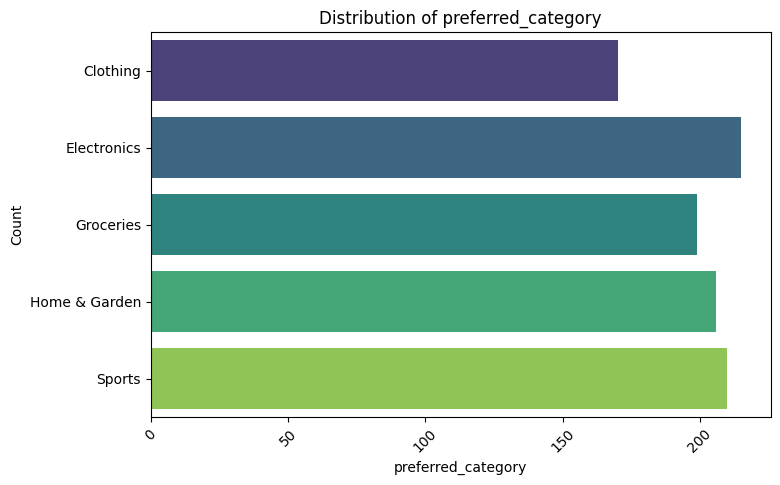

In [59]:
#Categorical Analysis
# Bar plots for categorical variables
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(df[col], palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


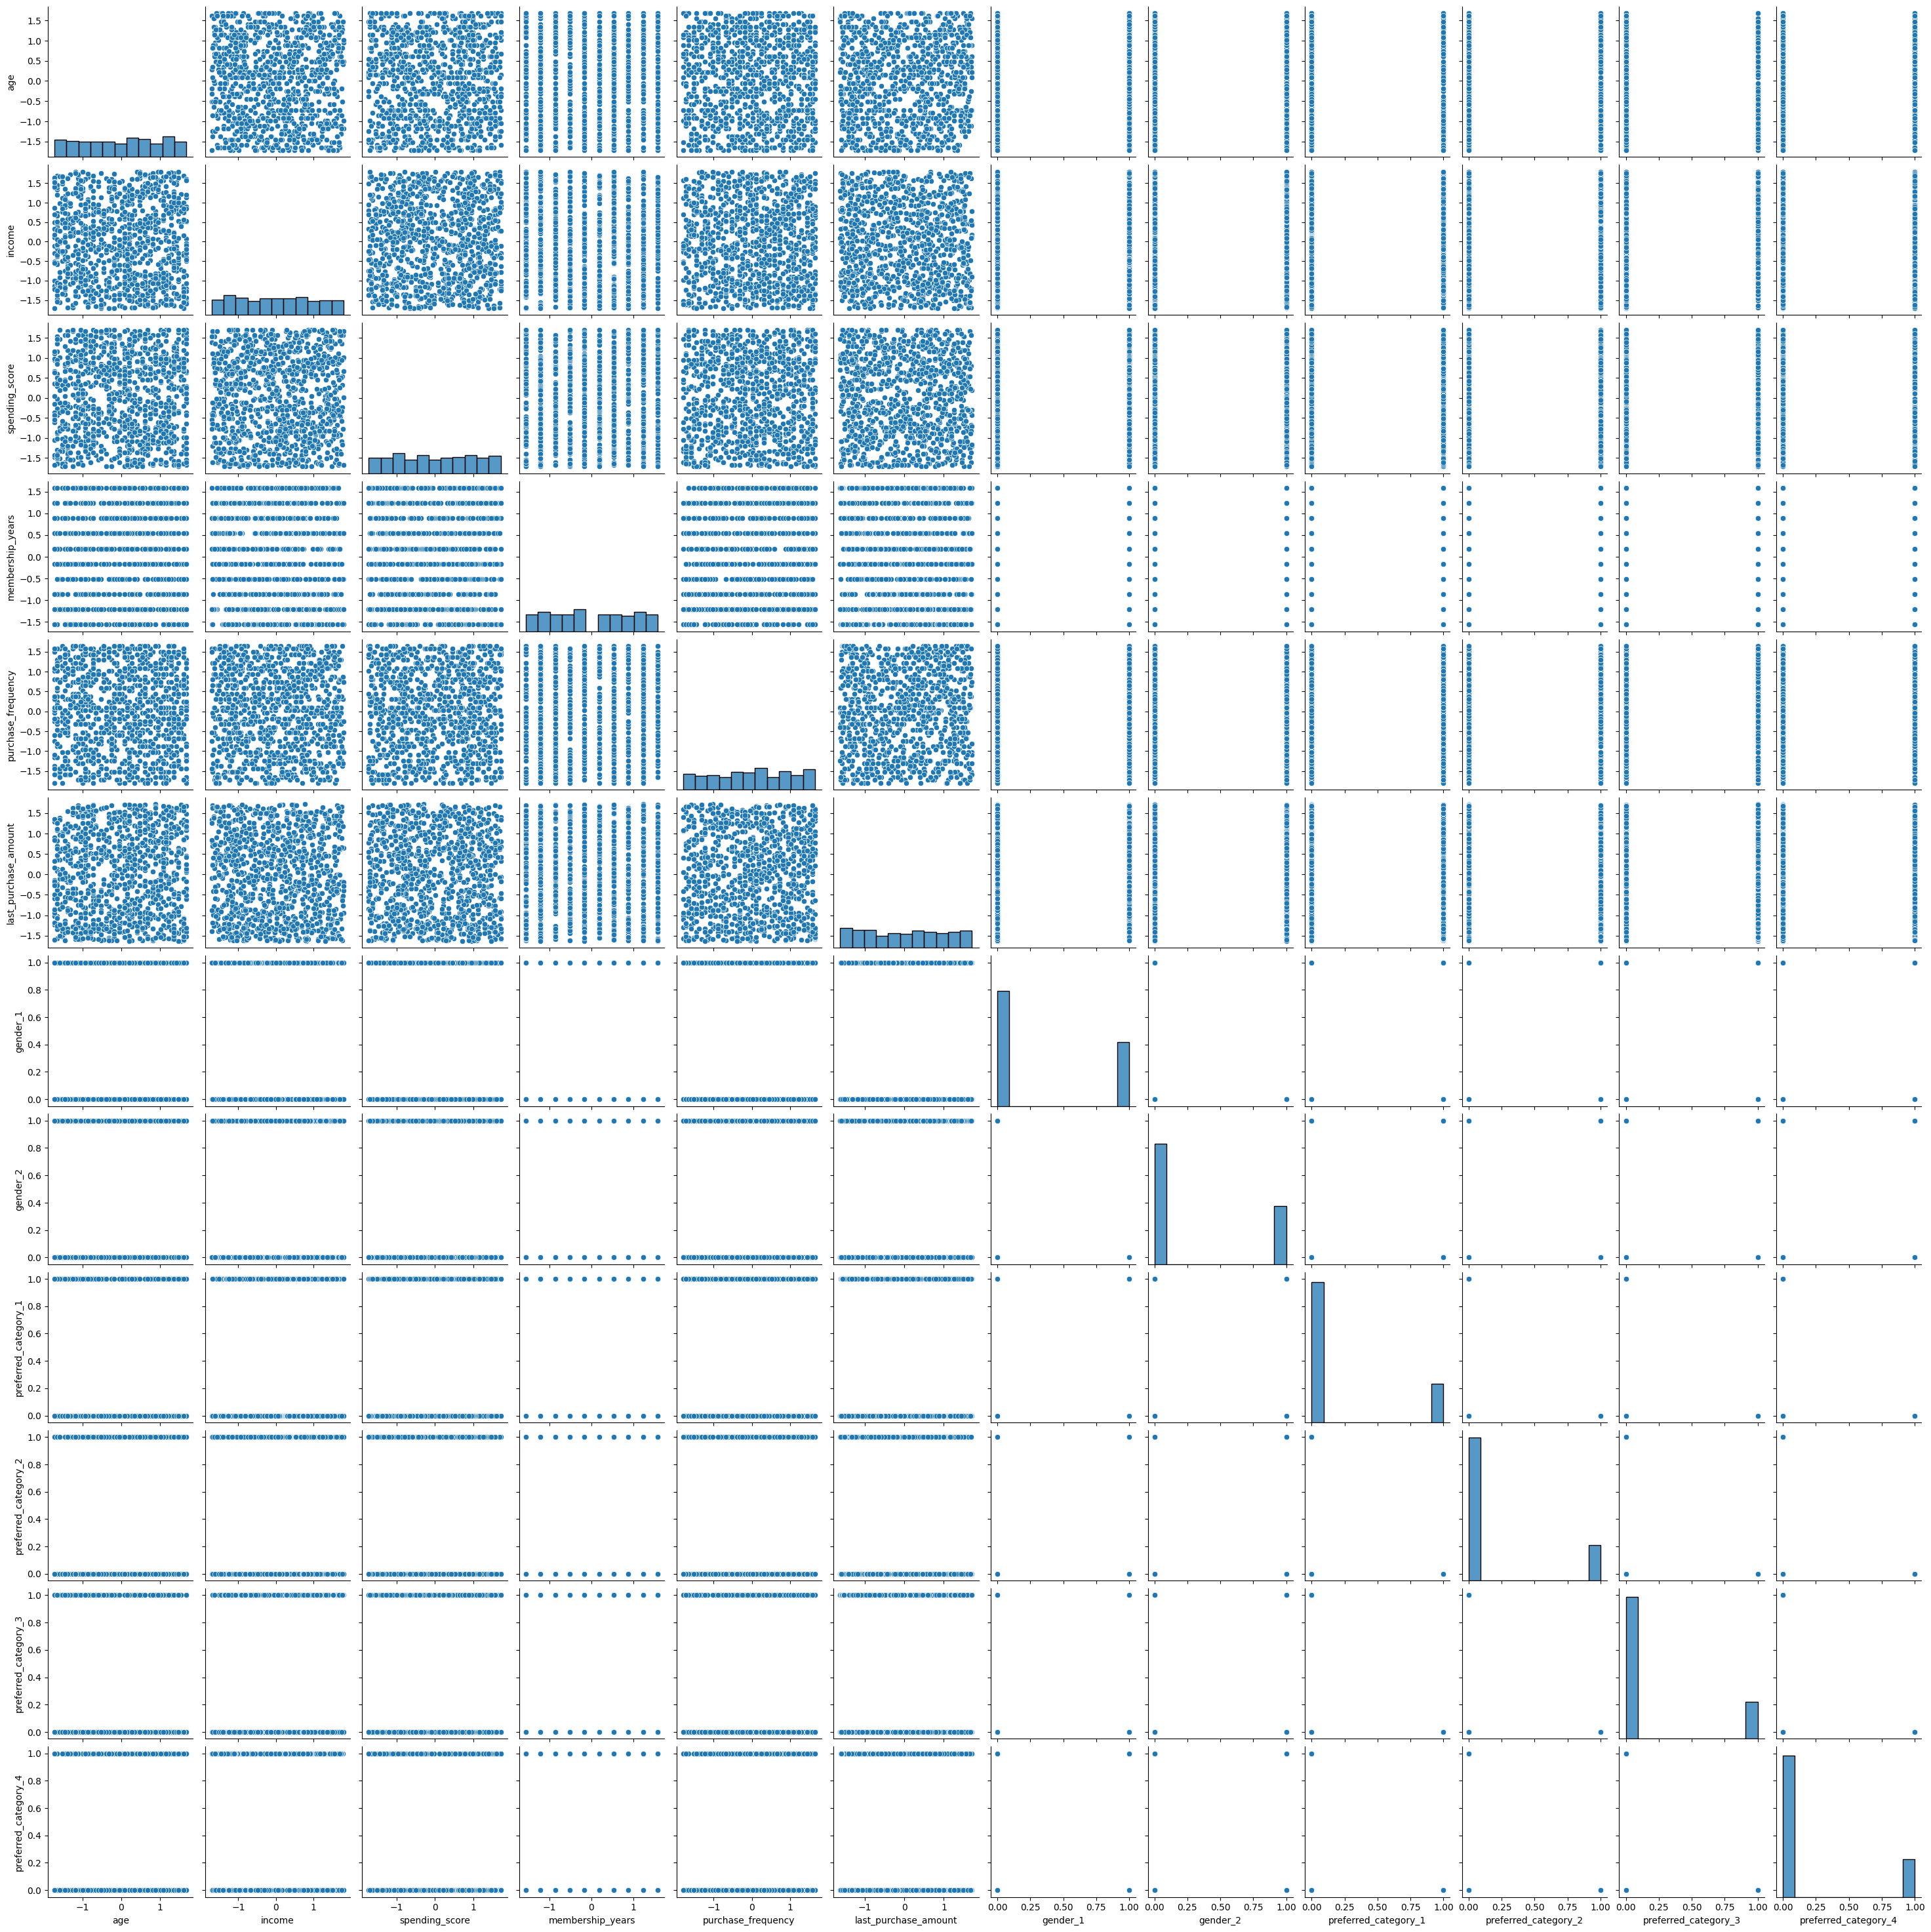

In [69]:
# Pair plot for different features
sns.pairplot(df)
plt.show()

In [60]:
#Cluster Analysis (Post-Clustering)
# Assuming clustering has been performed and a "Cluster" column exists
if 'Cluster' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='Feature1', y='Feature2', hue='Cluster', palette='viridis', s=100)
    plt.title('Cluster Visualization')
    plt.xlabel('Feature1')
    plt.ylabel('Feature2')
    plt.legend(title='Cluster')
    plt.show()

In [61]:
# Detecting outliers using Z-score
# Select only numerical columns for Z-score calculation
numerical_df = df.select_dtypes(include=np.number)

z_scores = np.abs((numerical_df - numerical_df.mean()) / numerical_df.std())
outliers = (z_scores > 3).sum()
print("Outliers detected using Z-score:")
print(outliers)

Outliers detected using Z-score:
id                      0
age                     0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
last_purchase_amount    0
dtype: int64


In [62]:
# Detecting outliers using IQR
# Select only numerical columns for IQR calculation
numerical_df = df.select_dtypes(include=np.number)

Q1 = numerical_df.quantile(0.25)
Q3 = numerical_df.quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((numerical_df < (Q1 - 1.5 * IQR)) | (numerical_df > (Q3 + 1.5 * IQR))).sum()
print("Outliers detected using IQR:")
print(outliers_iqr)

Outliers detected using IQR:
id                      0
age                     0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
last_purchase_amount    0
dtype: int64


**No outliers**

 # **Step 3:Data Preprocessing**

In [63]:
#Encode Categorical Variables
# Label Encoding for binary categorical variables
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# One-Hot Encoding for multi-category columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [64]:
##Normalize Numerical Features
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

**PCA**

In [89]:
# Dimensionality Reduction using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(df)

#**Step 4:Feature Engineering**

In [65]:
#Combine Features
# Example: Create a spending-to-income ratio
if 'Spending' in df.columns and 'Income' in df.columns:
    df['Spending_Income_Ratio'] = df['Spending'] / df['Income']


In [66]:
#Drop Irrelevant Columns
# Drop unnecessary columns like 'id'
columns_to_drop = ['id'] if 'id' in df.columns else []
df = df.drop(columns=columns_to_drop)


#**Step 5: Model Building**

In [36]:
# Elbow Method to determine the optimal number of clusters
inertia = []
range_clusters = range(1, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

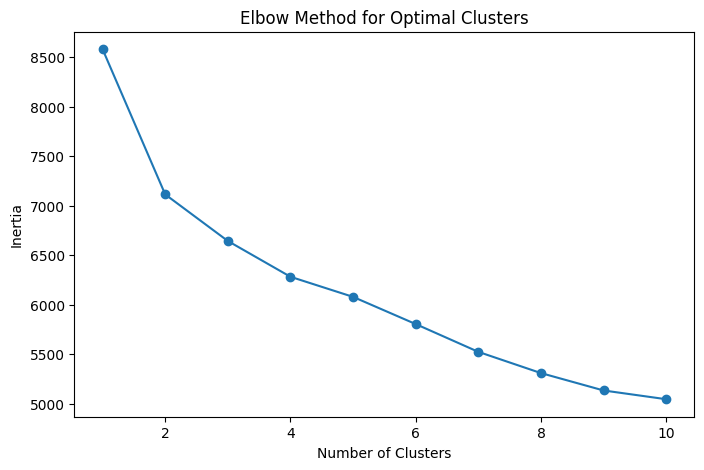

In [37]:
# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [70]:
# Fit K-Means with the optimal number of clusters (e.g., 3 clusters as determined)
optimal_clusters = 3  # Replace this with the value determined from the Elbow curve
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(df)


In [71]:
# Analyze and interpret clusters
df.groupby('KMeans_Cluster').mean()

age    income  spending_score  membership_years  \
KMeans_Cluster                                                         
0              -0.904672  0.067208       -0.263948          0.211907   
1               0.275164  0.266692        0.151012         -0.237617   
2               0.584543 -0.310051        0.104870          0.023874   

                purchase_frequency  last_purchase_amount  gender_1  gender_2  \
KMeans_Cluster                                                                 
0                         0.560703             -0.145200  0.427692  0.258462   
1                        -0.609634             -0.822268  0.301538  0.316923   
2                         0.045436              0.898363  0.342857  0.400000   

                preferred_category_1  preferred_category_2  \
KMeans_Cluster                                               
0                           0.215385              0.200000   
1                           0.209231              0.218462   
2                           0.220000              0.180000   

                preferred_category_3  preferred_category_4  
KMeans_Cluster                                              
0                           0.221538              0.206154  
1                           0.175385              0.212308  
2                           0.220000              0.211429

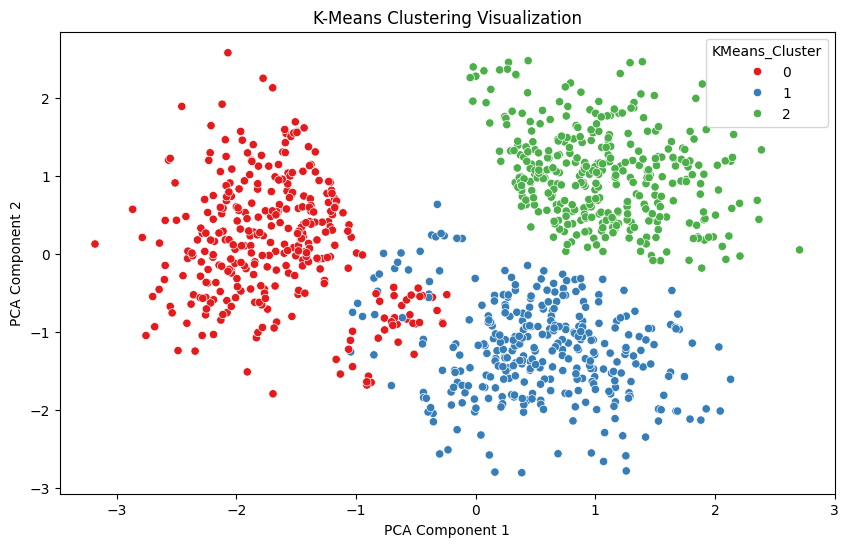

In [93]:
# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=df['KMeans_Cluster'], palette='Set1') # Access the column using df['KMeans_Cluster']
plt.title('K-Means Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

**Hierarchical Clustering**

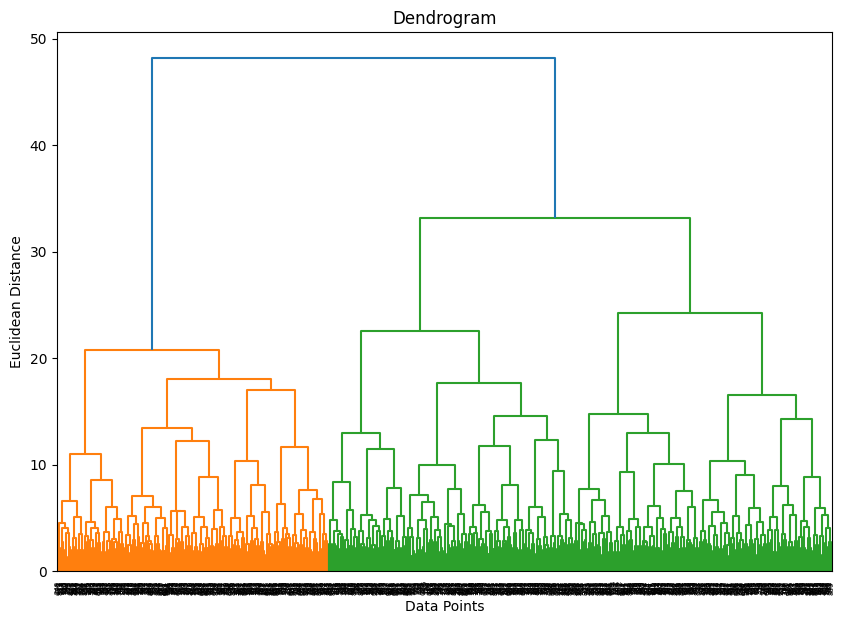

In [73]:
# Create a dendrogram
plt.figure(figsize=(10, 7))
linkage_matrix = linkage(df, method='ward')  # Method can be 'single', 'complete', 'average'
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

In [74]:
# Fit Agglomerative Clustering with the desired number of clusters
hc = AgglomerativeClustering(n_clusters=optimal_clusters, metric='euclidean', linkage='ward') # Change 'affinity' to 'metric'
df['Hierarchical_Cluster'] = hc.fit_predict(df)

In [75]:
# Analyze and interpret clusters
df.groupby('Hierarchical_Cluster').mean()

age    income  spending_score  membership_years  \
Hierarchical_Cluster                                                         
0                     0.198592  0.287399        0.208970         -0.168522   
1                     0.558128 -0.271406        0.097367         -0.019169   
2                    -0.824845 -0.002244       -0.327020          0.198192   

                      purchase_frequency  last_purchase_amount  gender_1  \
Hierarchical_Cluster                                                       
0                              -0.472807             -0.776196  0.309309   
1                               0.014129              0.919210  0.334286   
2                               0.481072             -0.199528  0.432177   

                      gender_2  preferred_category_1  preferred_category_2  \
Hierarchical_Cluster                                                         
0                     0.306306              0.216216              0.216216   
1                     0.417143              0.225714              0.174286   
2                     0.249211              0.201893              0.208202   

                      preferred_category_3  preferred_category_4  \
Hierarchical_Cluster                                               
0                                 0.180180              0.192192   
1                                 0.225714              0.208571   
2                                 0.211356              0.230284   

                      KMeans_Cluster  
Hierarchical_Cluster                  
0                           0.879880  
1                           1.977143  
2                           0.126183

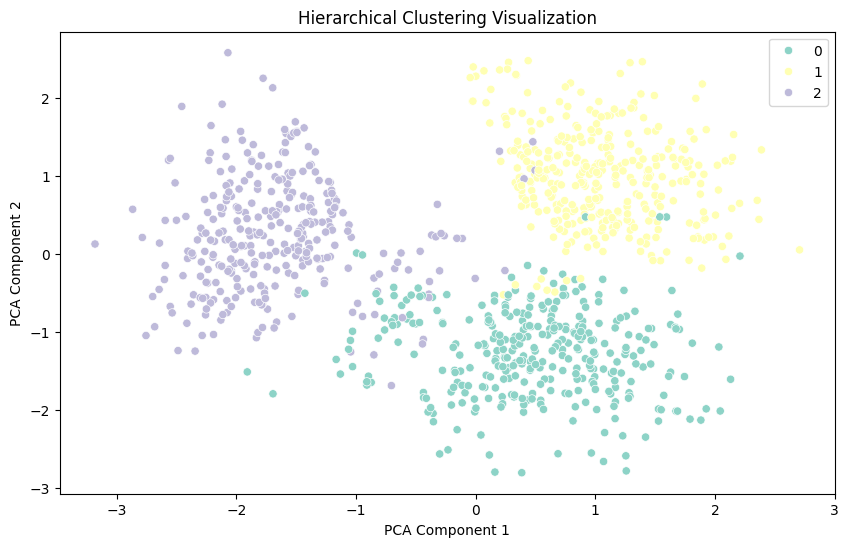

In [97]:
plt.figure(figsize=(10, 6))
# Assuming 'hc' is the AgglomerativeClustering instance and 'df' contains the data
agglo_labels = hc.labels_  # Get the cluster labels from the fitted AgglomerativeClustering instance
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=agglo_labels, palette='Set3')
plt.title('Hierarchical Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

**DBSCAN**

In [76]:
from sklearn.cluster import DBSCAN
# Experiment with different eps and min_samples
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(df)

In [77]:
# Analyze noise points (-1 represents noise in DBSCAN)
noise_points = df[df['DBSCAN_Cluster'] == -1]
print(f'Number of noise points: {len(noise_points)}')

Number of noise points: 1000


In [78]:
# Analyze clusters
df.groupby('DBSCAN_Cluster').mean()

age        income  spending_score  membership_years  \
DBSCAN_Cluster                                                                 
-1             -8.093526e-17 -8.173323e-17   -7.949197e-17     -1.201261e-16   

                purchase_frequency  last_purchase_amount  gender_1  gender_2  \
DBSCAN_Cluster                                                                 
-1                   -6.716849e-18         -9.625634e-17     0.357     0.327   

                preferred_category_1  preferred_category_2  \
DBSCAN_Cluster                                               
-1                             0.215                 0.199   

                preferred_category_3  preferred_category_4  KMeans_Cluster  \
DBSCAN_Cluster                                                               
-1                             0.206                  0.21           1.025   

                Hierarchical_Cluster  
DBSCAN_Cluster                        
-1                             0.984

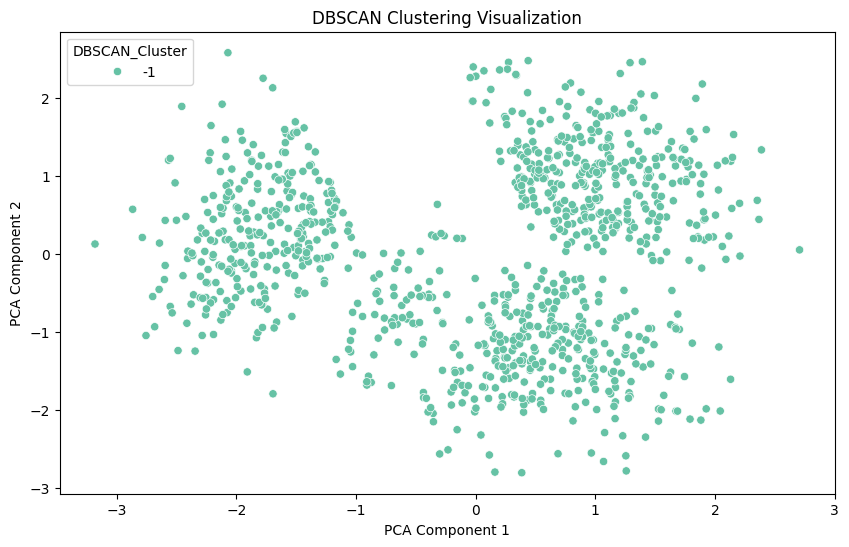

In [95]:
#DBSCAN Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=df['DBSCAN_Cluster'], palette='Set2') # Use df['DBSCAN_Cluster'] instead of dbscan_labels
plt.title('DBSCAN Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

#**Step 6: Evaluation and Visualization**

In [79]:
#Cluster Characteristics
# Summarize characteristics of clusters
cluster_summary = df.groupby('KMeans_Cluster').mean()  # Replace with the desired cluster column
cluster_summary

age    income  spending_score  membership_years  \
KMeans_Cluster                                                         
0              -0.904672  0.067208       -0.263948          0.211907   
1               0.275164  0.266692        0.151012         -0.237617   
2               0.584543 -0.310051        0.104870          0.023874   

                purchase_frequency  last_purchase_amount  gender_1  gender_2  \
KMeans_Cluster                                                                 
0                         0.560703             -0.145200  0.427692  0.258462   
1                        -0.609634             -0.822268  0.301538  0.316923   
2                         0.045436              0.898363  0.342857  0.400000   

                preferred_category_1  preferred_category_2  \
KMeans_Cluster                                               
0                           0.215385              0.200000   
1                           0.209231              0.218462   
2                           0.220000              0.180000   

                preferred_category_3  preferred_category_4  \
KMeans_Cluster                                               
0                           0.221538              0.206154   
1                           0.175385              0.212308   
2                           0.220000              0.211429   

                Hierarchical_Cluster  DBSCAN_Cluster  
KMeans_Cluster                                        
0                           1.729231            -1.0  
1                           0.221538            -1.0  
2                           1.000000            -1.0

In [81]:
#Silhouette Score
# Evaluate clustering quality
silhouette_avg = silhouette_score(df, df['KMeans_Cluster'])  # Replace with appropriate cluster column
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.17281795839236175


In [88]:
# Calculate Silhouette Score for KMeans
kmeans_silhouette = silhouette_score(df, df['KMeans_Cluster'])  # Replace with appropriate cluster column
agg_silhouette = silhouette_score(df, df['Hierarchical_Cluster'])  # Replace with appropriate cluster column

print("Silhouette Score for KMeans:", kmeans_silhouette)
print("Silhouette Score for Hierarchical Clustering:", agg_silhouette)


Silhouette Score for KMeans: 0.17281795839236175
Silhouette Score for Hierarchical Clustering: 0.18130364271354296


In [87]:
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples
df['DBSCAN_Cluster'] = dbscan.fit_predict(df)

# Analyze clusters and noise points
cluster_labels = np.unique(df['DBSCAN_Cluster'])
n_clusters = len(cluster_labels) - (1 if -1 in cluster_labels else 0)  # Exclude noise if present

# Calculate Silhouette Score only if there are at least 2 clusters
if n_clusters >= 2:
    dbscan_silhouette = silhouette_score(df, df['DBSCAN_Cluster'])
    print("Silhouette Score for DBSCAN:", dbscan_silhouette)
else:
    print("Silhouette Score cannot be calculated: DBSCAN found less than 2 clusters.")

Silhouette Score cannot be calculated: DBSCAN found less than 2 clusters.
